# CH08

## 08-1 합성곱 신경망의 구성 요소
`합성곱` `필터` `특성맵` `패딩` `스트라이드` `풀링`

## 합성곱
- 합성곱: 입력 데이터 일부에 가중치를 곱하는 것, 왼쪽에서 오른쪽으로-위에서 아래로 한칸 씩 이동하며 출력을 만든다.(가중치 개수는 정하기 나름)
- 합성곱 신경망에서는 뉴런 = **필터, 커널** 이라고 부름
- 특성 맵: 합성곱 계산을 통해 얻은 출력

## 케라스 합성곱 층
```python
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3, 3), activation='relu')
```
  - Conv2D의 첫 번째 매개 변수는 필터(=도장)의 개수
  - kernel_size 매개변수는 필터에 사용할 커널의 크기 지정

- 합성곱 신경망: 합성곱 층을 1개 이상 사용한 인공 신경망
- 패딩: 입력 배열 주위를 가상의 원소로 채우는 것, 커널이 도장에 찍을 횟수를 늘려주는 역할
- 세임 패딩: 입력과 특성 맵 크기를 동일하게 만들기 위해 입력 주위에 0으로 패딩하는 것
- 밸리드 패딩: 패딩 없이 순수한 입력 배열에서만 합성곱을 하여 특성 맵을 만드는 경우->특성 맵의 크기가 줄어듦

- 스트라이드: 필터가 이동하는 칸의 개수, 대부분 기본값을 사용하기 때문에 stride변수는 잘 사용하지 않음

```python
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu',
padding= 'same', strides=1)
```

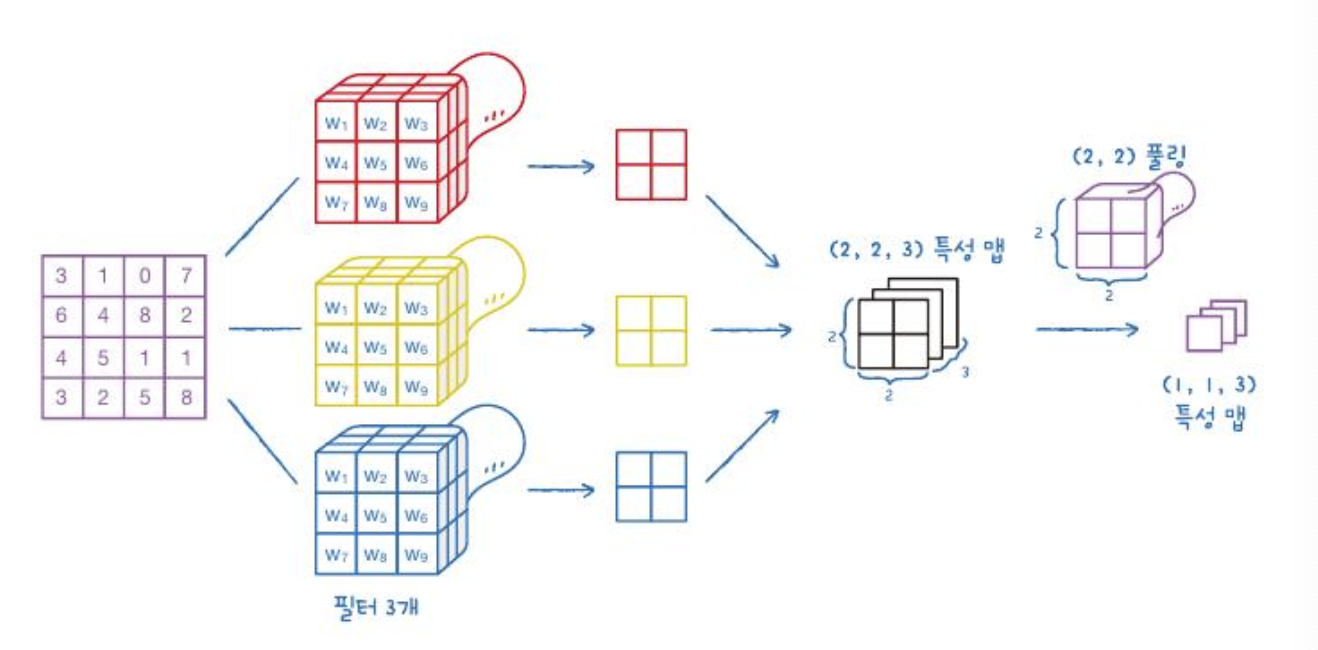

- 풀링: 합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄이는 역할을 수행, 특성맵의 갯수는 줄이지 않음
- 최대 풀링: 도장을 찍은 영역에서 가장 큰 값을 계산
- 평균 풀링: 도장을 찍은 영역에서 평균값을 계산

## 합성곱 신경망의 전체 구조

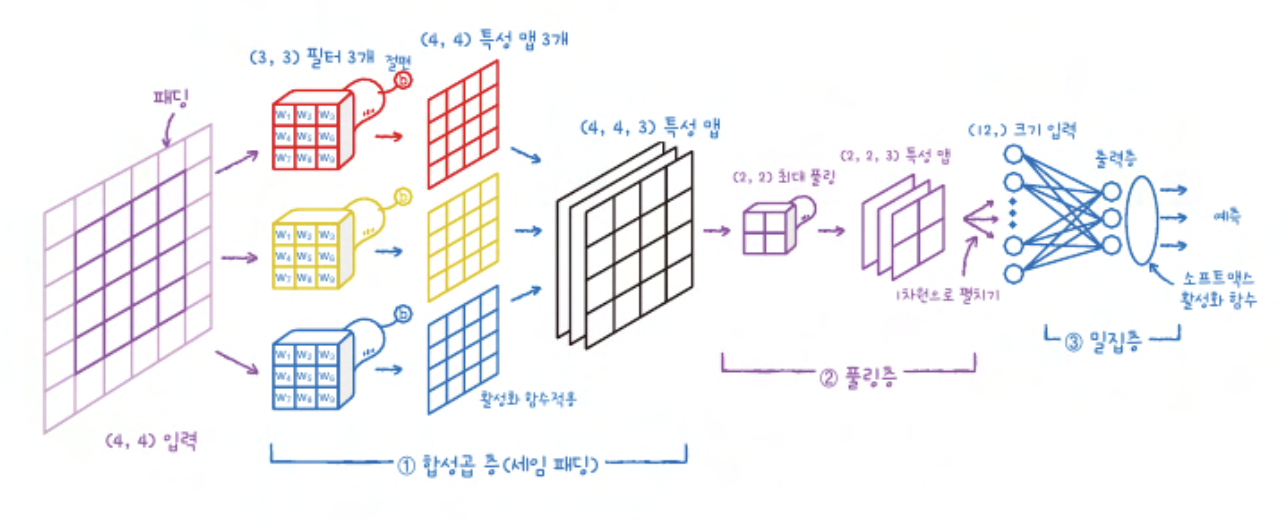

## 08-2 합성곱 신경망을 사용한 이미지 분류
`Conv2D` `MaxPooling2D` `plot_model`

## 패션 MNIST 데이터 불러오기

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

# 데이터 스케일 0~1 사이로 바꾸고 훈련 세트와 검증 세트로 나누기
# 완전 연결 신경망에서는 입력 이미지를 밀집층에 연결하기 위해 일렬로 펼쳐야 하므로 reshape()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## 합성곱 신경망 만들기

In [ ]:
# Sequantial 클래스의 객체를 만들고 첫번째 합성곱층인 Conv2D를 추가
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
# 필터 개수 64개로 늘림
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
# 3차원 특성 맵 펼치기
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
# 은닉층과 출력층 사이에 드롭 아웃 추가
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
# 모델 구조 출력
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

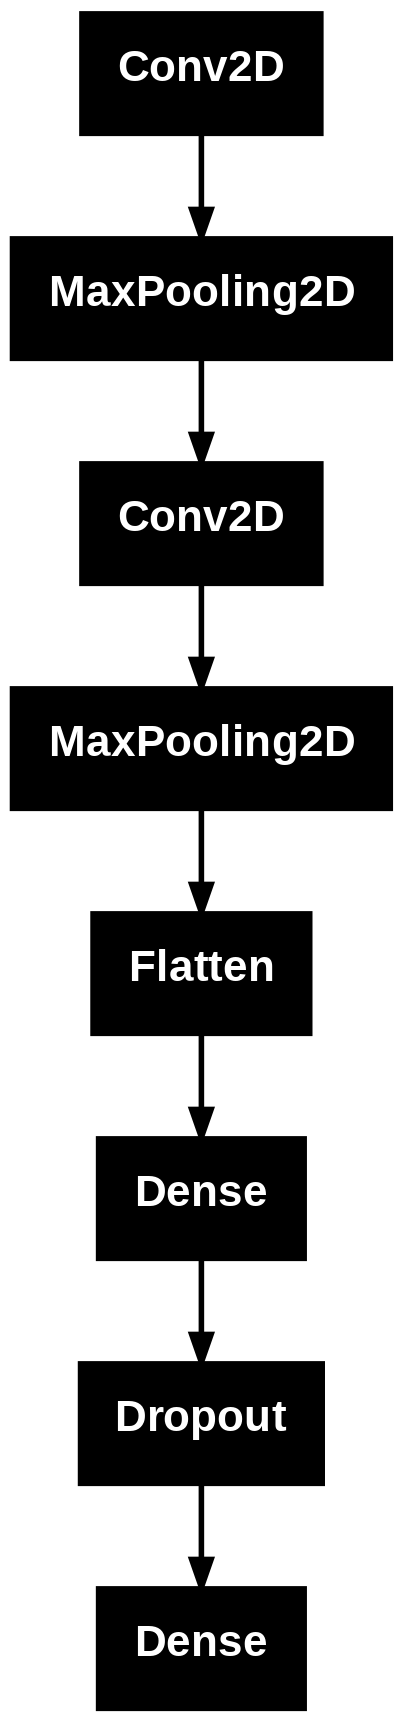

In [ ]:
# plot_model(): 층 구성을 그림으로 표현해주는 함수
keras.utils.plot_model(model)

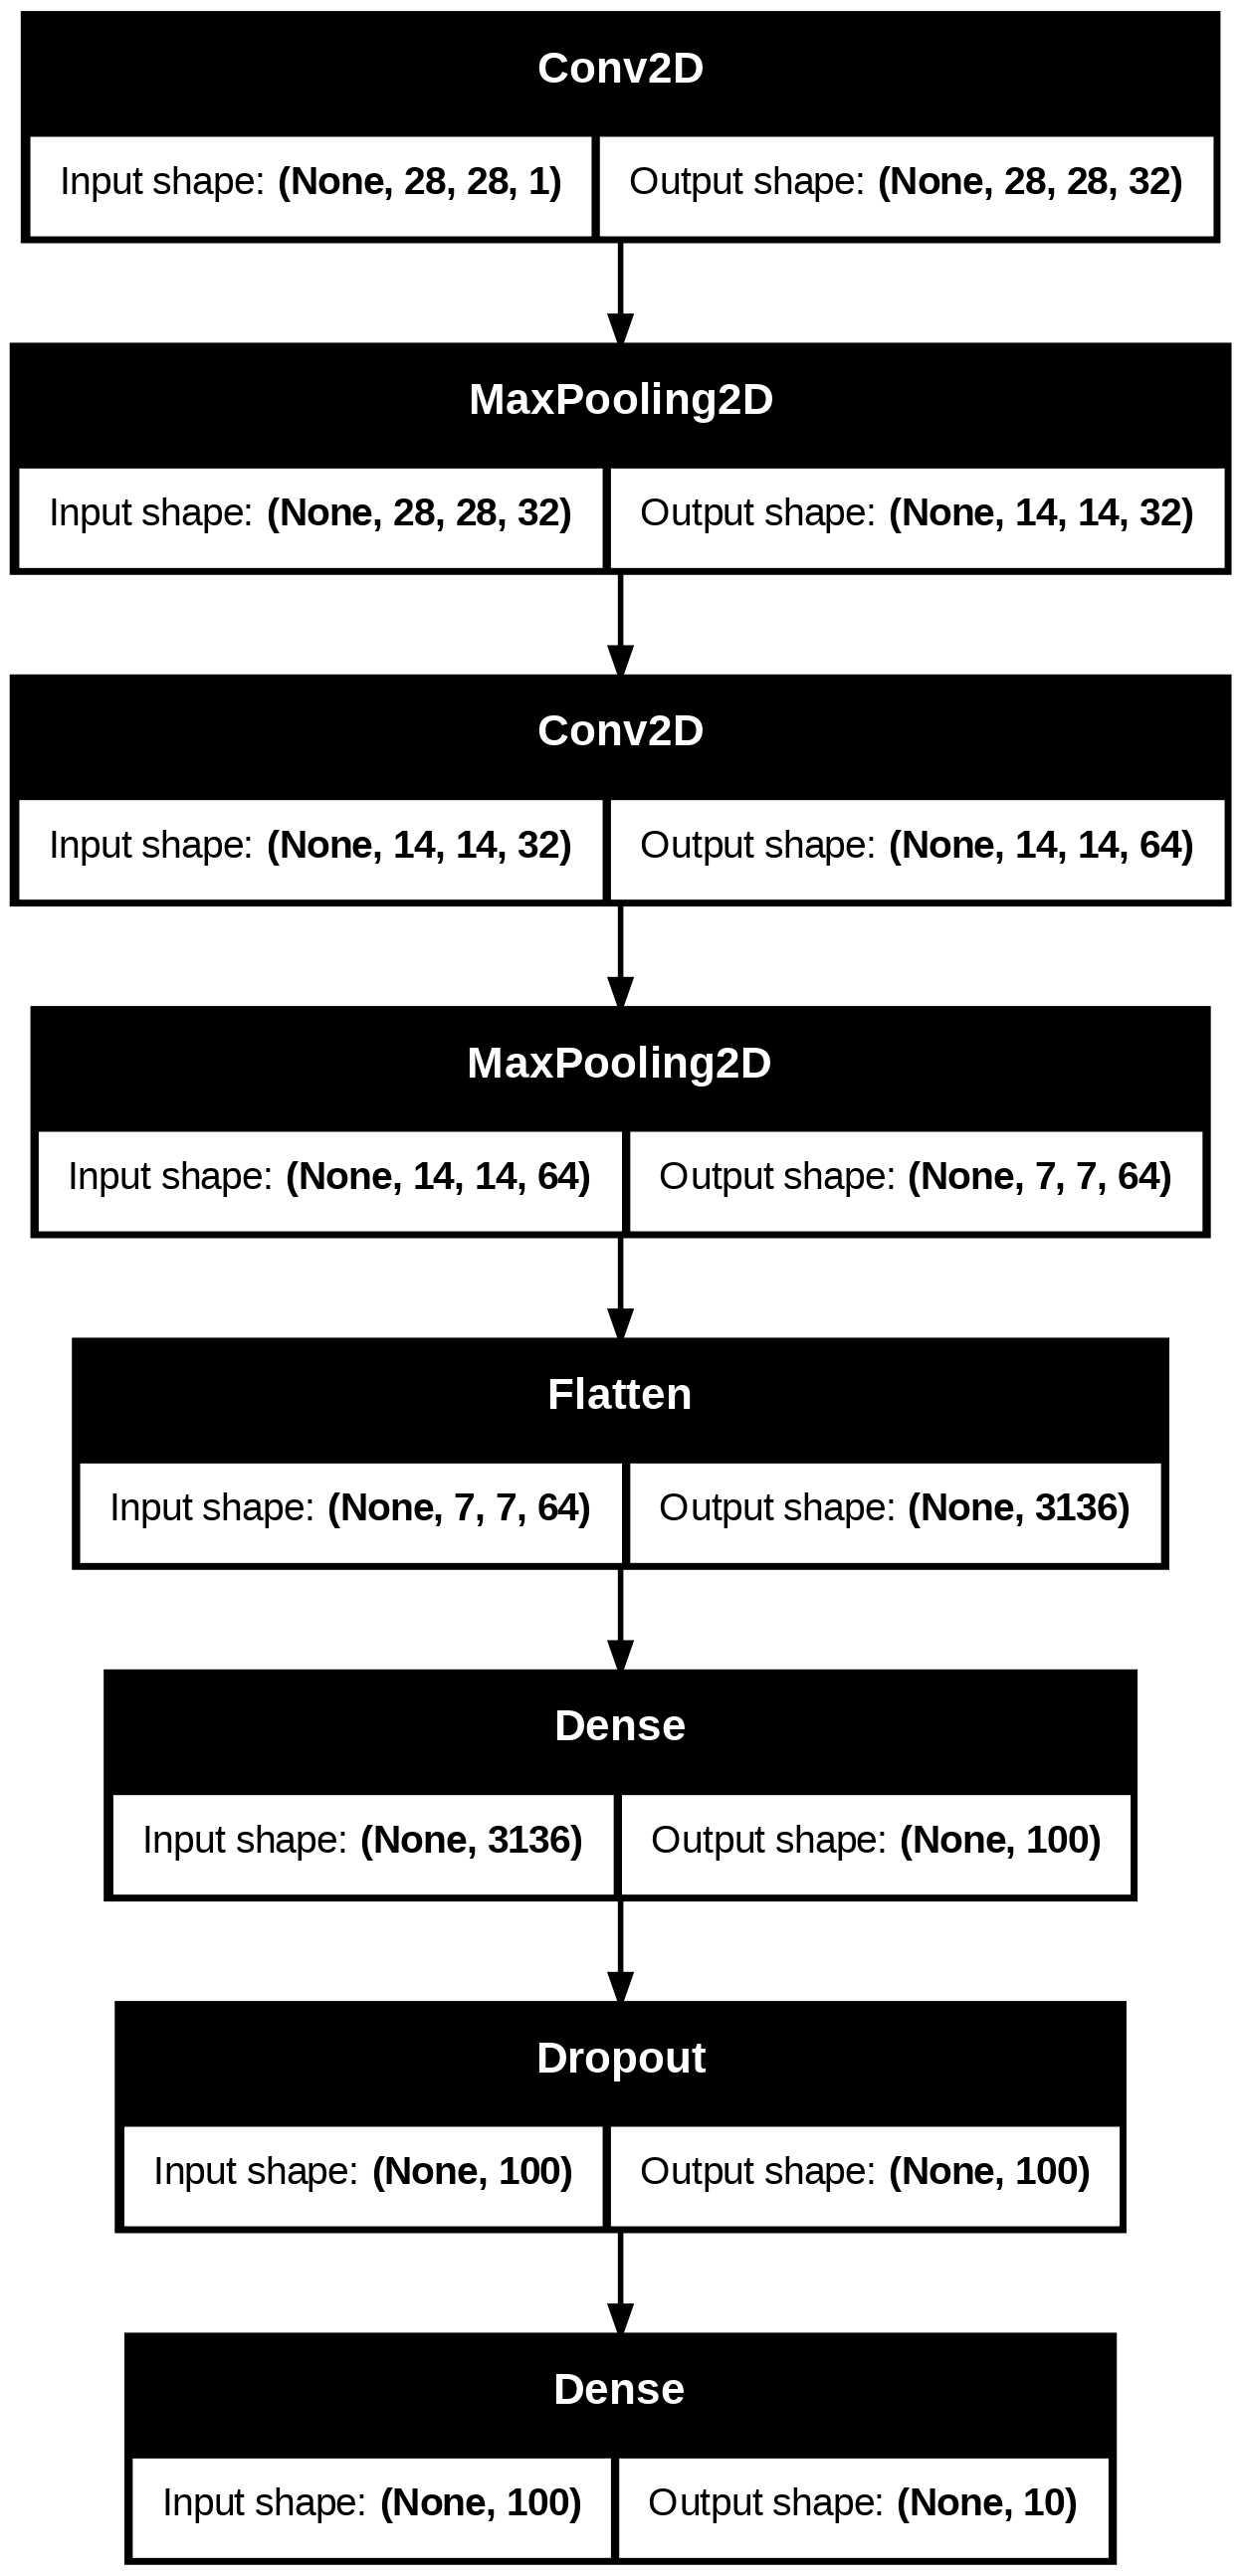

In [ ]:
# 입출력 크기 표시
keras.utils.plot_model(model, show_shapes=True)

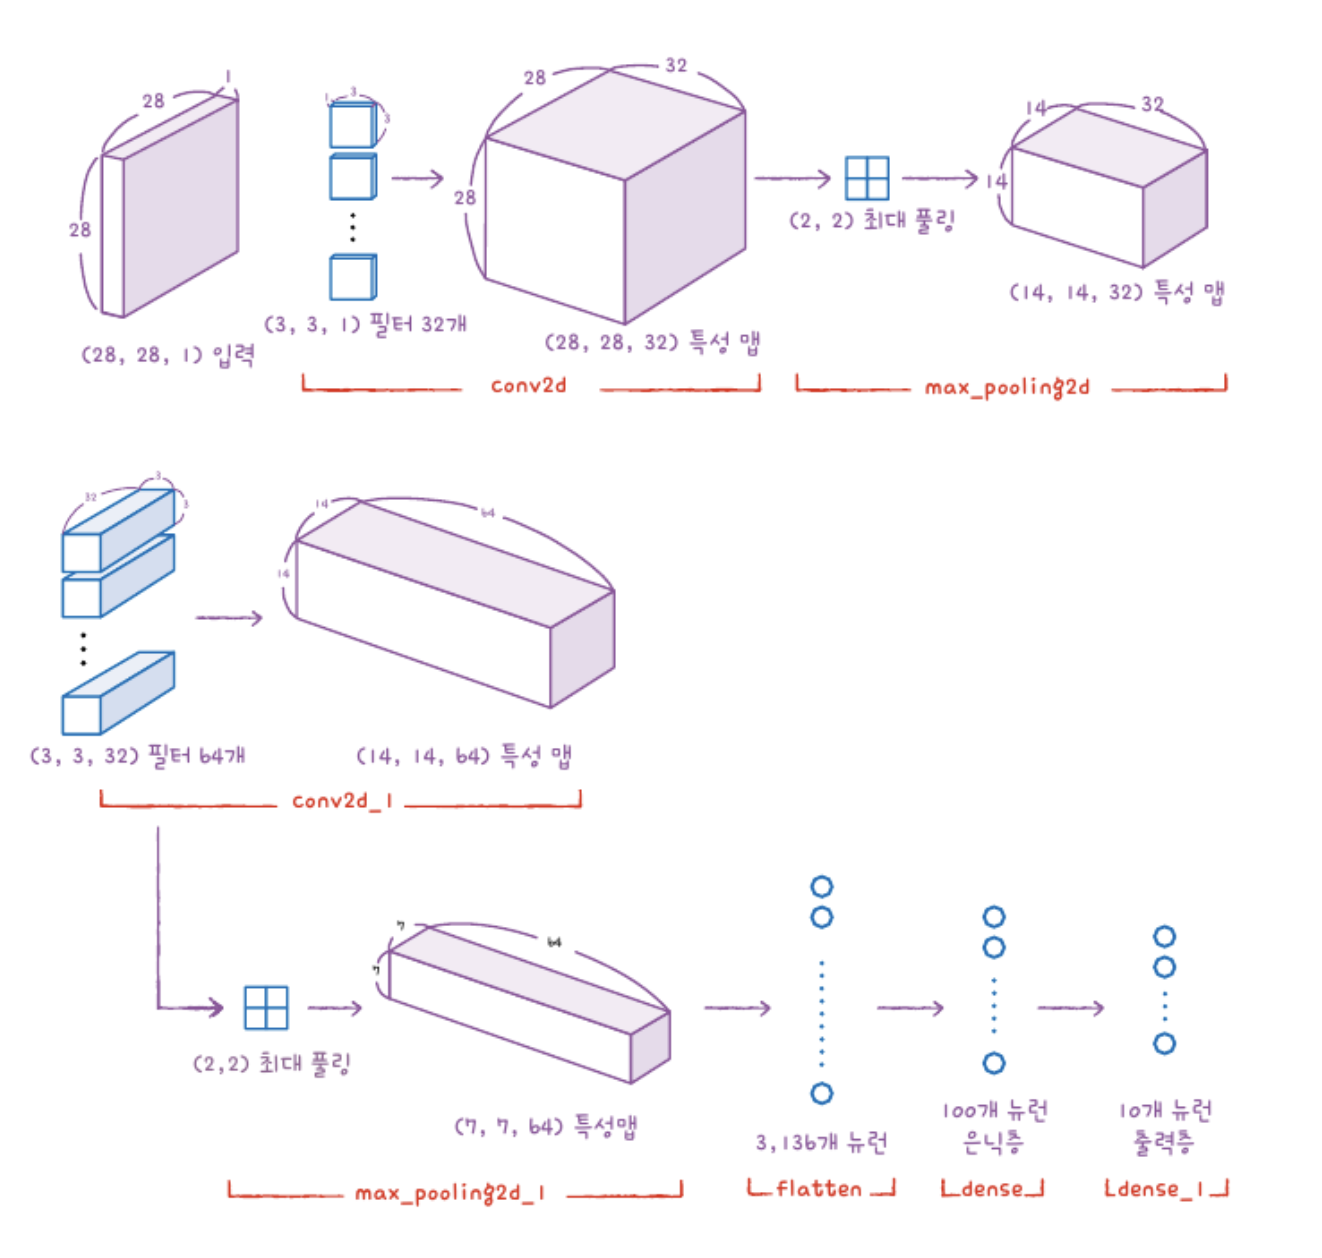

## 모델 컴파일과 훈련

In [ ]:
# 7장 3절과 거의 동일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.7493 - loss: 0.7043 - val_accuracy: 0.8833 - val_loss: 0.3211
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8726 - loss: 0.3552 - val_accuracy: 0.8975 - val_loss: 0.2714
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8905 - loss: 0.2989 - val_accuracy: 0.9087 - val_loss: 0.2455
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9043 - loss: 0.2608 - val_accuracy: 0.9100 - val_loss: 0.2380
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9113 - loss: 0.2400 - val_accuracy: 0.9136 - val_loss: 0.2326
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9184 - loss: 0.2174 - val_accuracy: 0.9201 - val_loss: 0.2193
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9263 - loss: 0.2022 - val_accuracy: 0.9151 - val_loss: 0.2330
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9314 - loss: 0.1847 -

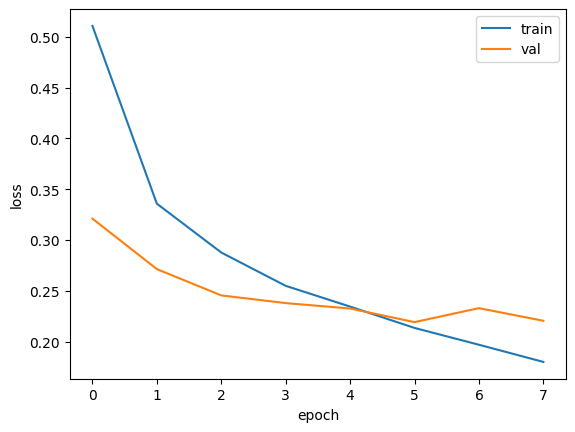

In [ ]:
# 손실 그래프로 조기 종료 여부 확인
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# 세트 성능 평가
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9231 - loss: 0.2125


[0.21925583481788635, 0.9200833439826965]

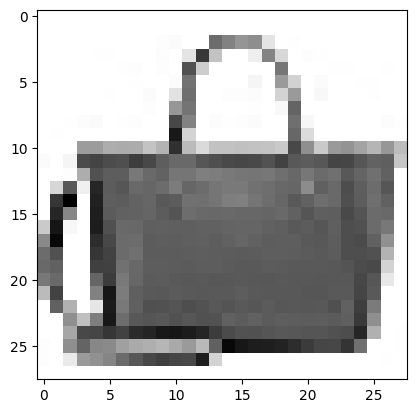

In [ ]:
# 샘플 이미지 확인
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [ ]:
# 10개의 클래스에 대한 예측 확률 출력
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
[[8.7171188e-19 1.7660993e-26 4.9542759e-21 1.7801612e-19 6.3786056e-18
  4.7823439e-21 2.4926043e-19 3.2195997e-17 1.0000000e+00 4.5894585e-22]]


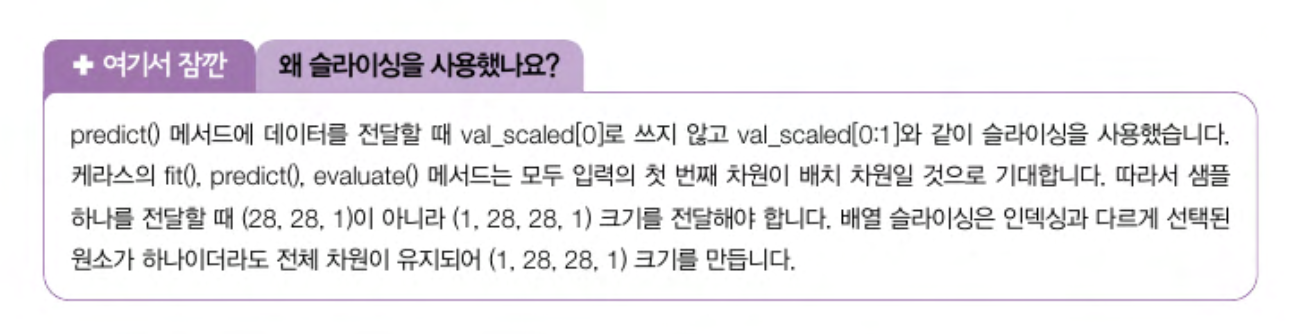

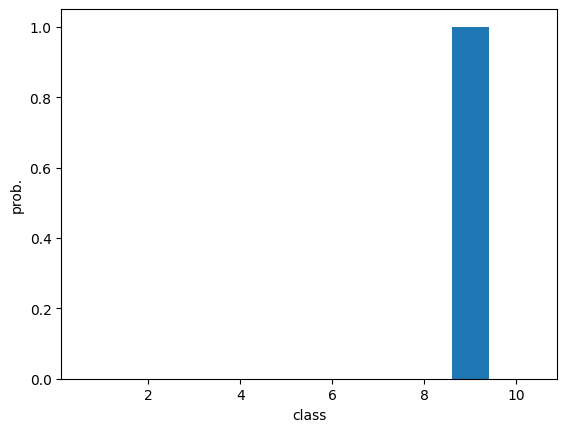

In [ ]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [ ]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [ ]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [ ]:
# 실전 투입 시 얻을 수 있는 예상 성능 예측

test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [ ]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9114 - loss: 0.2617


[0.2516588270664215, 0.9125000238418579]